## Industrial Machines Malfunction Detection using Deep Learning
### Valves, Slide-rails and Industrial Fans

#### Amplitude Envelope, RMS-energy

- Rajesh Siraskar | v.3.1 31-May-2021: Compact Pythonic code

#### Basics
- [DSP: Basics](https://support.ircam.fr/docs/AudioSculpt/3.0/co/Sampling.html) - Aliasing, Nyquist Freq.,lowest detectable frequency
- Nyquist Frequency and the relation between sampling-rate and max. frequency
    - $F_{max} = Sampling Rate/2$
    - $F_{max}$ is called _Nyquist Frequency_

#### Time Domain Features
- Amplitude Envelope
- RMS Energy

In [13]:
import warnings
import os
from pathlib import Path
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import random
from matplotlib import pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

In [14]:
# Constants
PATH = 'audio_files/'
duration = 4   # Seconds of waveform to use
FRAME_SIZE = 1024
HOP_LENGHT = 512
FIG_W = 28
FIG_H = 24

In [15]:
# Extract some random file sample
machine_sound_category = ['Industrial_Fan_Normal', 'Industrial_Fan_Abnormal', 
                          'Slide_Rail_Normal', 'Slide_Rail_Abnormal',
                          'Valve_Normal', 'Valve_Abnormal']

audio_files = [f"{PATH}{x}/{random.randint(0, 99):08d}.wav" for x in machine_sound_category]

In [16]:
# Load file-3 as a sample 
ipd.Audio(audio_files[3])
waveform, sample_rate  = librosa.load(audio_files[3])

# Sample rate
print('Sampling rate:\t\t', sample_rate)
duration = 1/sample_rate
print('Duration of ONE sample:\t %0.6f seconds' % duration)
print('Duration of full audio:\t %4.2f seconds' % (duration*len(waveform)))

Sampling rate:		 22050
Duration of ONE sample:	 0.000045 seconds
Duration of full audio:	 10.00 seconds


### Load audio files and extract out waveforms and sample-rates

In [17]:
audio_files

['audio_files/Industrial_Fan_Normal/00000032.wav',
 'audio_files/Industrial_Fan_Abnormal/00000049.wav',
 'audio_files/Slide_Rail_Normal/00000014.wav',
 'audio_files/Slide_Rail_Abnormal/00000080.wav',
 'audio_files/Valve_Normal/00000019.wav',
 'audio_files/Valve_Abnormal/00000054.wav']

In [18]:
# wf_Sr is a list of (wf,sr) tuples
wf_sr = [librosa.load(x) for x in audio_files]

# Extract out the wf from the (wf,sr) tuples
wfs = [x[0] for x in wf_sr]

### Visualize the raw waveforms of normal vs abnormal sounds

In [19]:
def plot_waveforms(waveform=None, title="x", row=0, col=0,  n_plot=0):
    plt.subplot(row, col, n_plot)
    librosa.display.waveplot(waveform, alpha=0.5)
    plt.xticks(fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.title(title, fontsize=24)

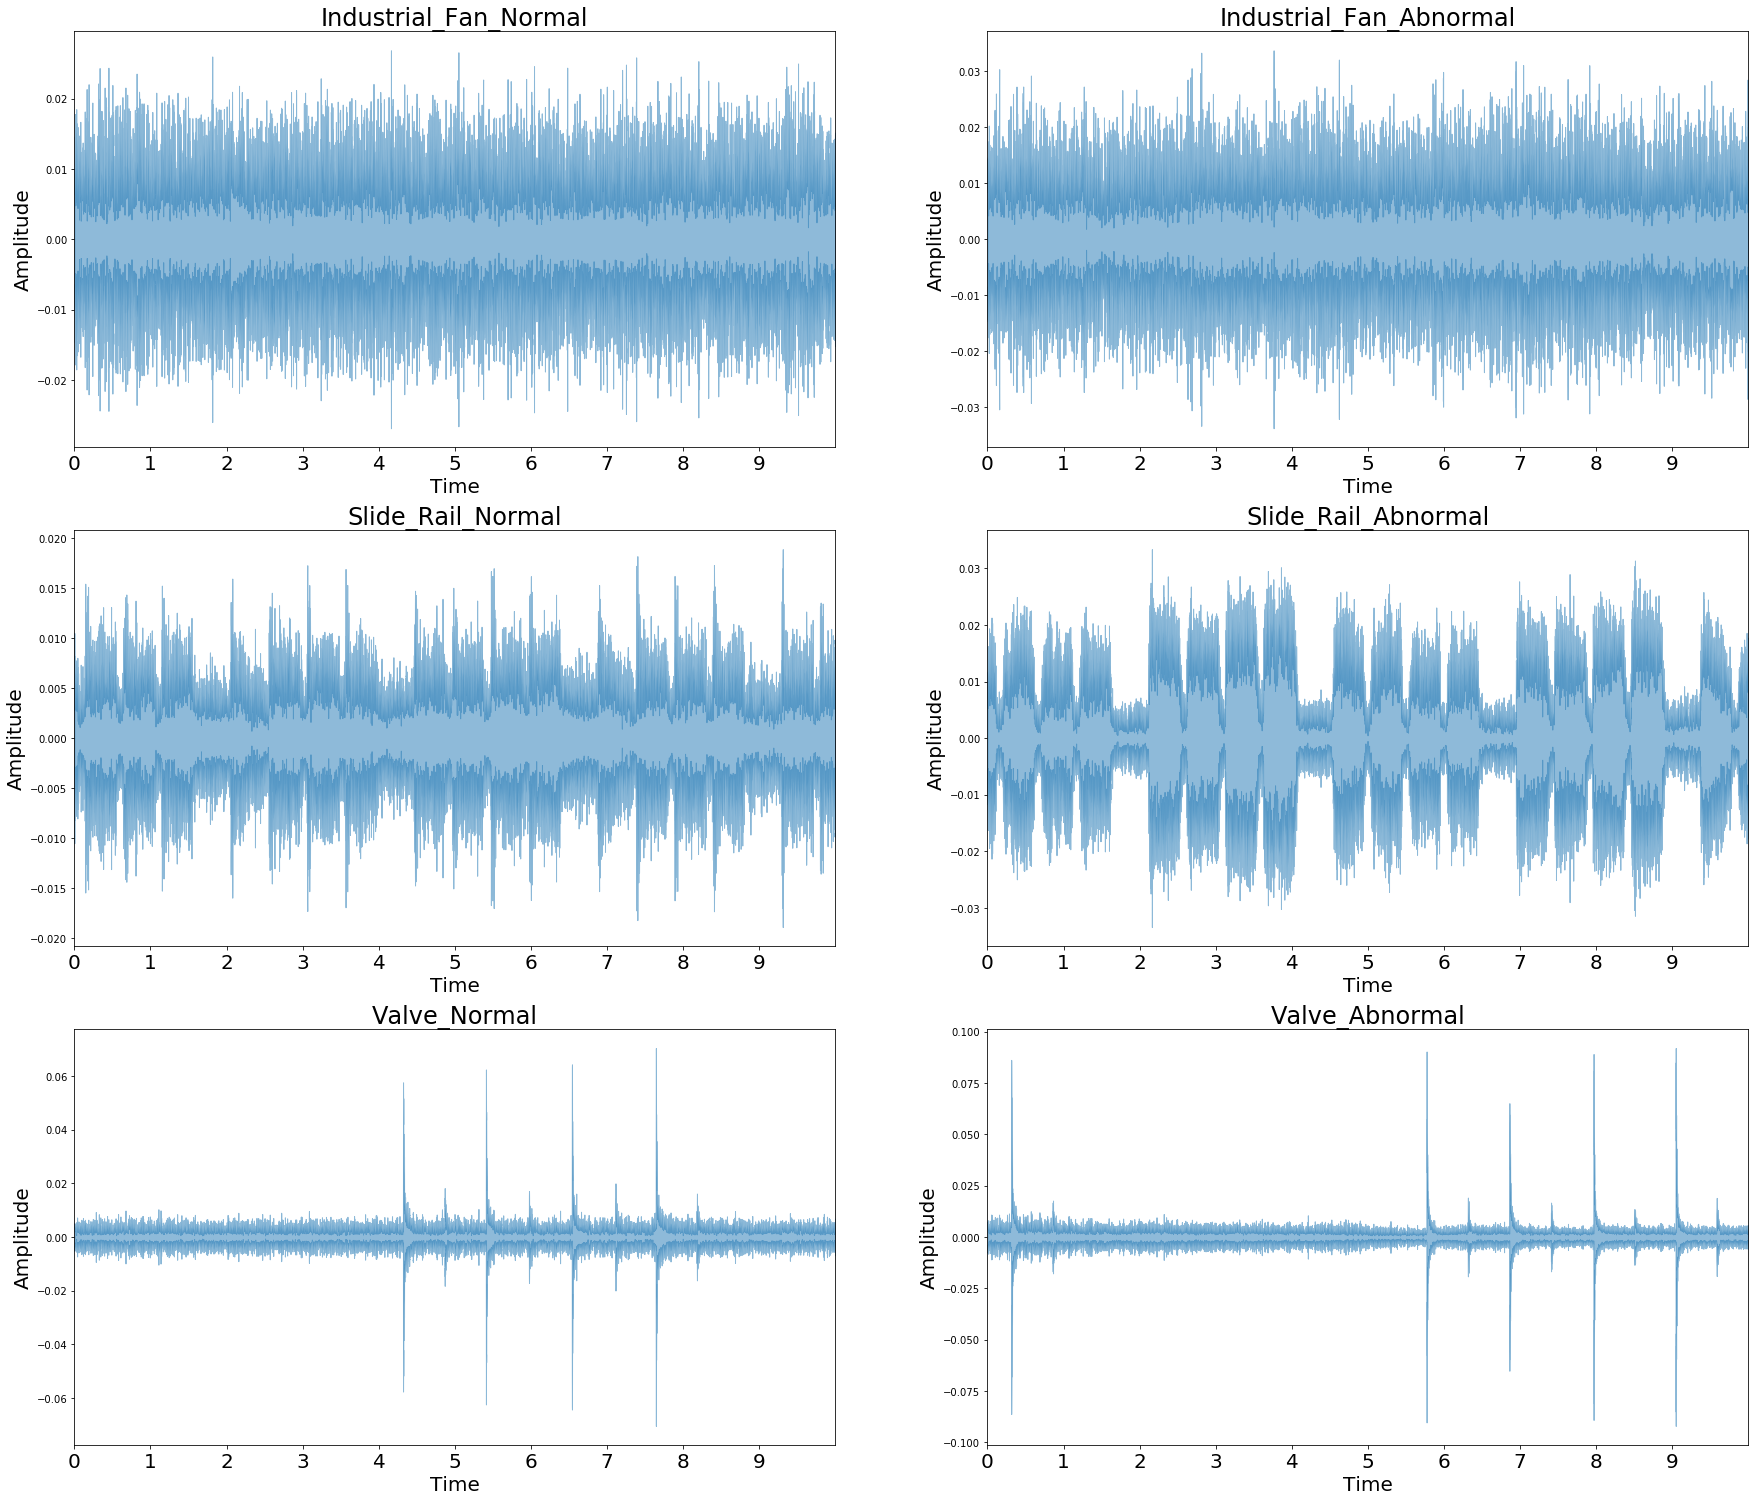

In [20]:
plt.figure(figsize=(30, 26))
for n in range(len(wfs)):
    plot_waveforms(waveform=wfs[n], title=machine_sound_category[n], row=3, col=2, n_plot=n+1)

### Amplitude Envelope

In [21]:
def amplitude_envelope (signal, frame_size, hop_length):    
    return np.array([max(signal[t:t+frame_size]) for t in range (0, signal.size, hop_length)])

In [22]:
def plot_superimposed_waveforms(waveform=None, superimposed_waveform=None, title="x", row=0, col=0,  n_plot=0):
    
    # Compute the time length for AEs
    frames = range(len(superimposed_waveform))
    T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
    
    plt.subplot(row, col, n_plot)
    librosa.display.waveplot(waveform, alpha=0.3)
    plt.plot(T, superimposed_waveform, color='r')
    plt.xticks(fontsize=20)
    plt.xlabel('Time', fontsize=20)
    plt.ylabel('Amplitude', fontsize=20)
    plt.title(title, fontsize=24)

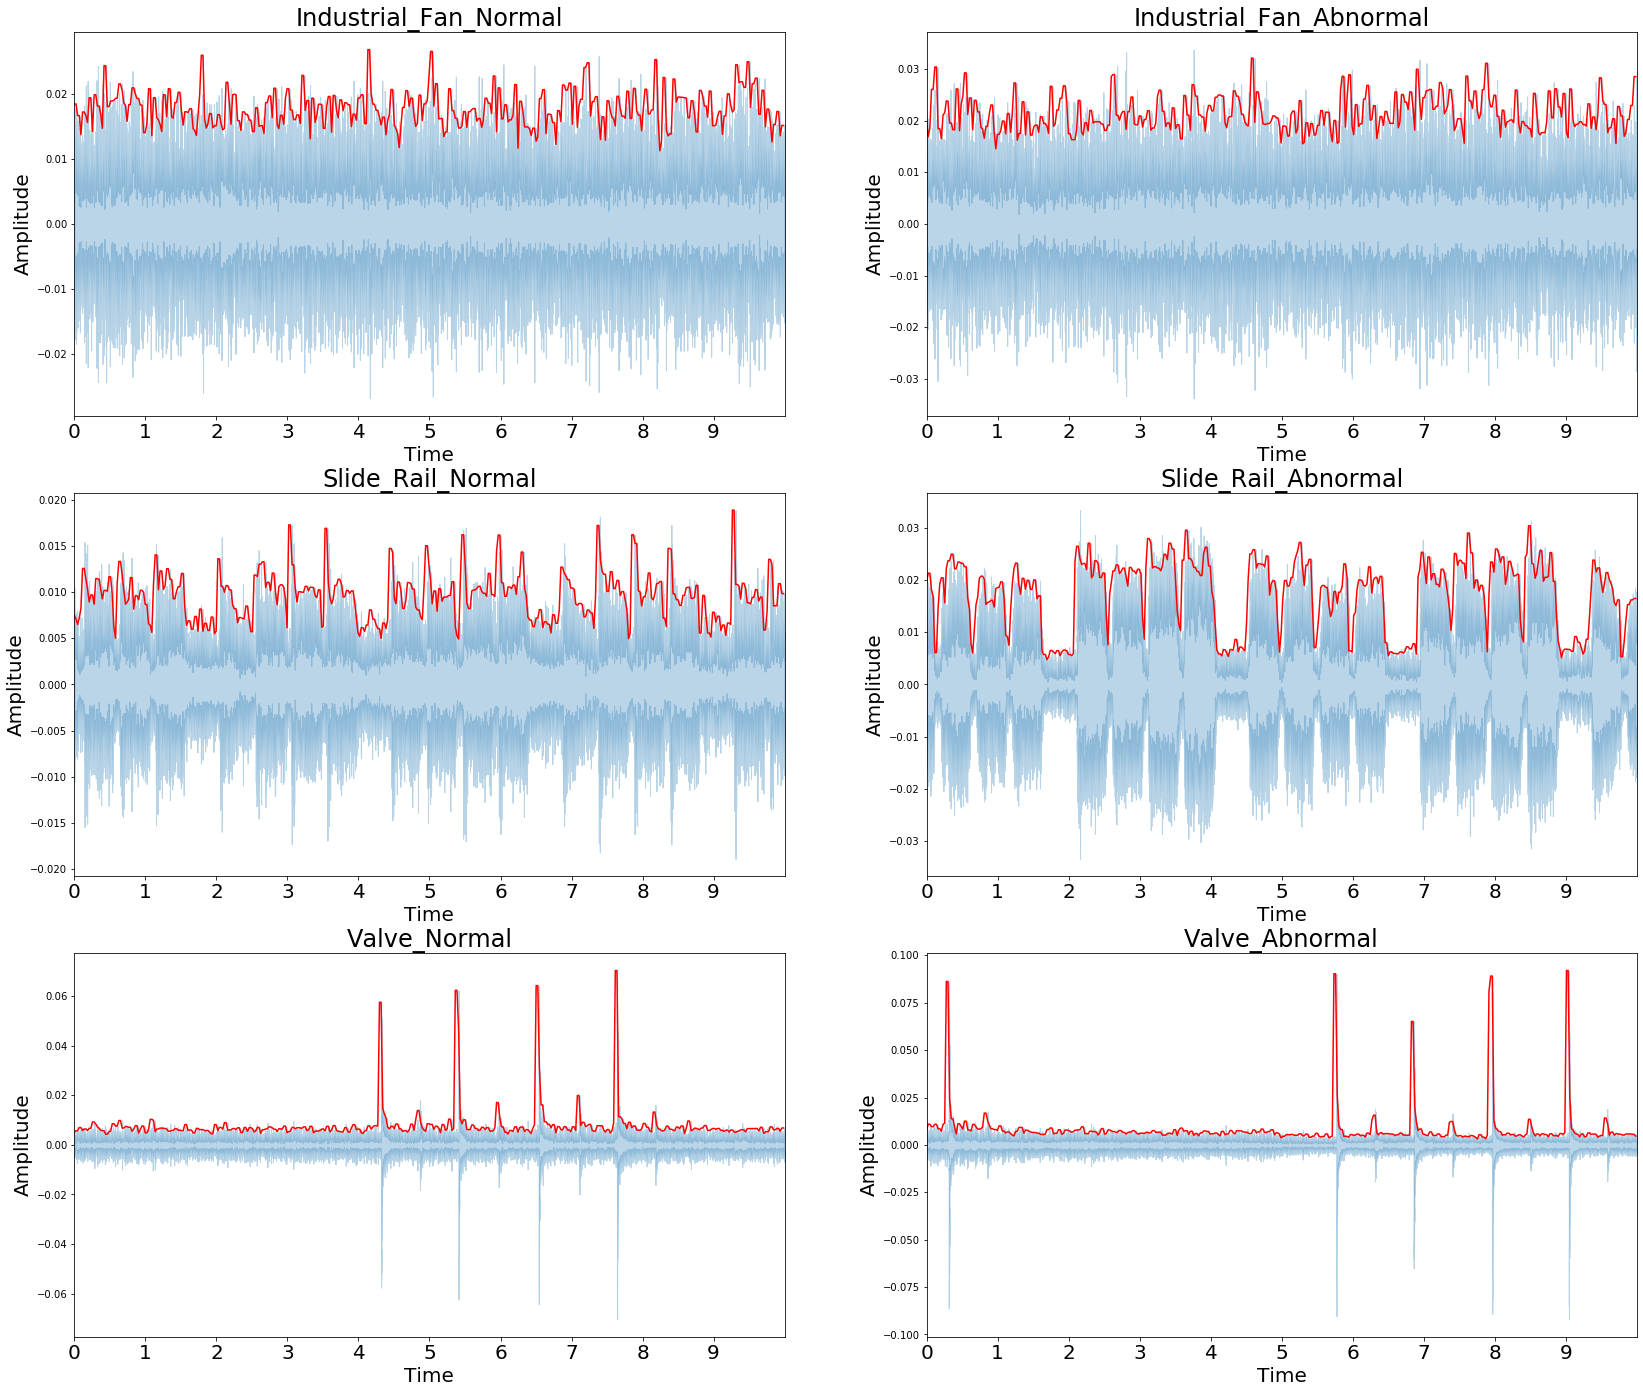

In [24]:
AE_wfs = [amplitude_envelope(x, FRAME_SIZE, HOP_LENGHT) for x in wfs]

# Visualize the AE waveforms
plt.figure(figsize=(FIG_W, FIG_H))
for n in range(len(wfs)):
    plot_superimposed_waveforms(waveform=wfs[n], superimposed_waveform=AE_wfs[n], 
                                title=machine_sound_category[n], row=3, col=2, n_plot=n+1)

RMS Energy
==============================================

Note: librosa rms funciton returns shape of (xxx, 1) and need to take rms[0] to plot values

In [25]:
def rms_energy(signal, frame_size, hop_length):
    rmse = []
    return np.array([np.sqrt(np.mean(np.power(signal[t:t+frame_size],2))) for t in range (0, signal.size, hop_length)])

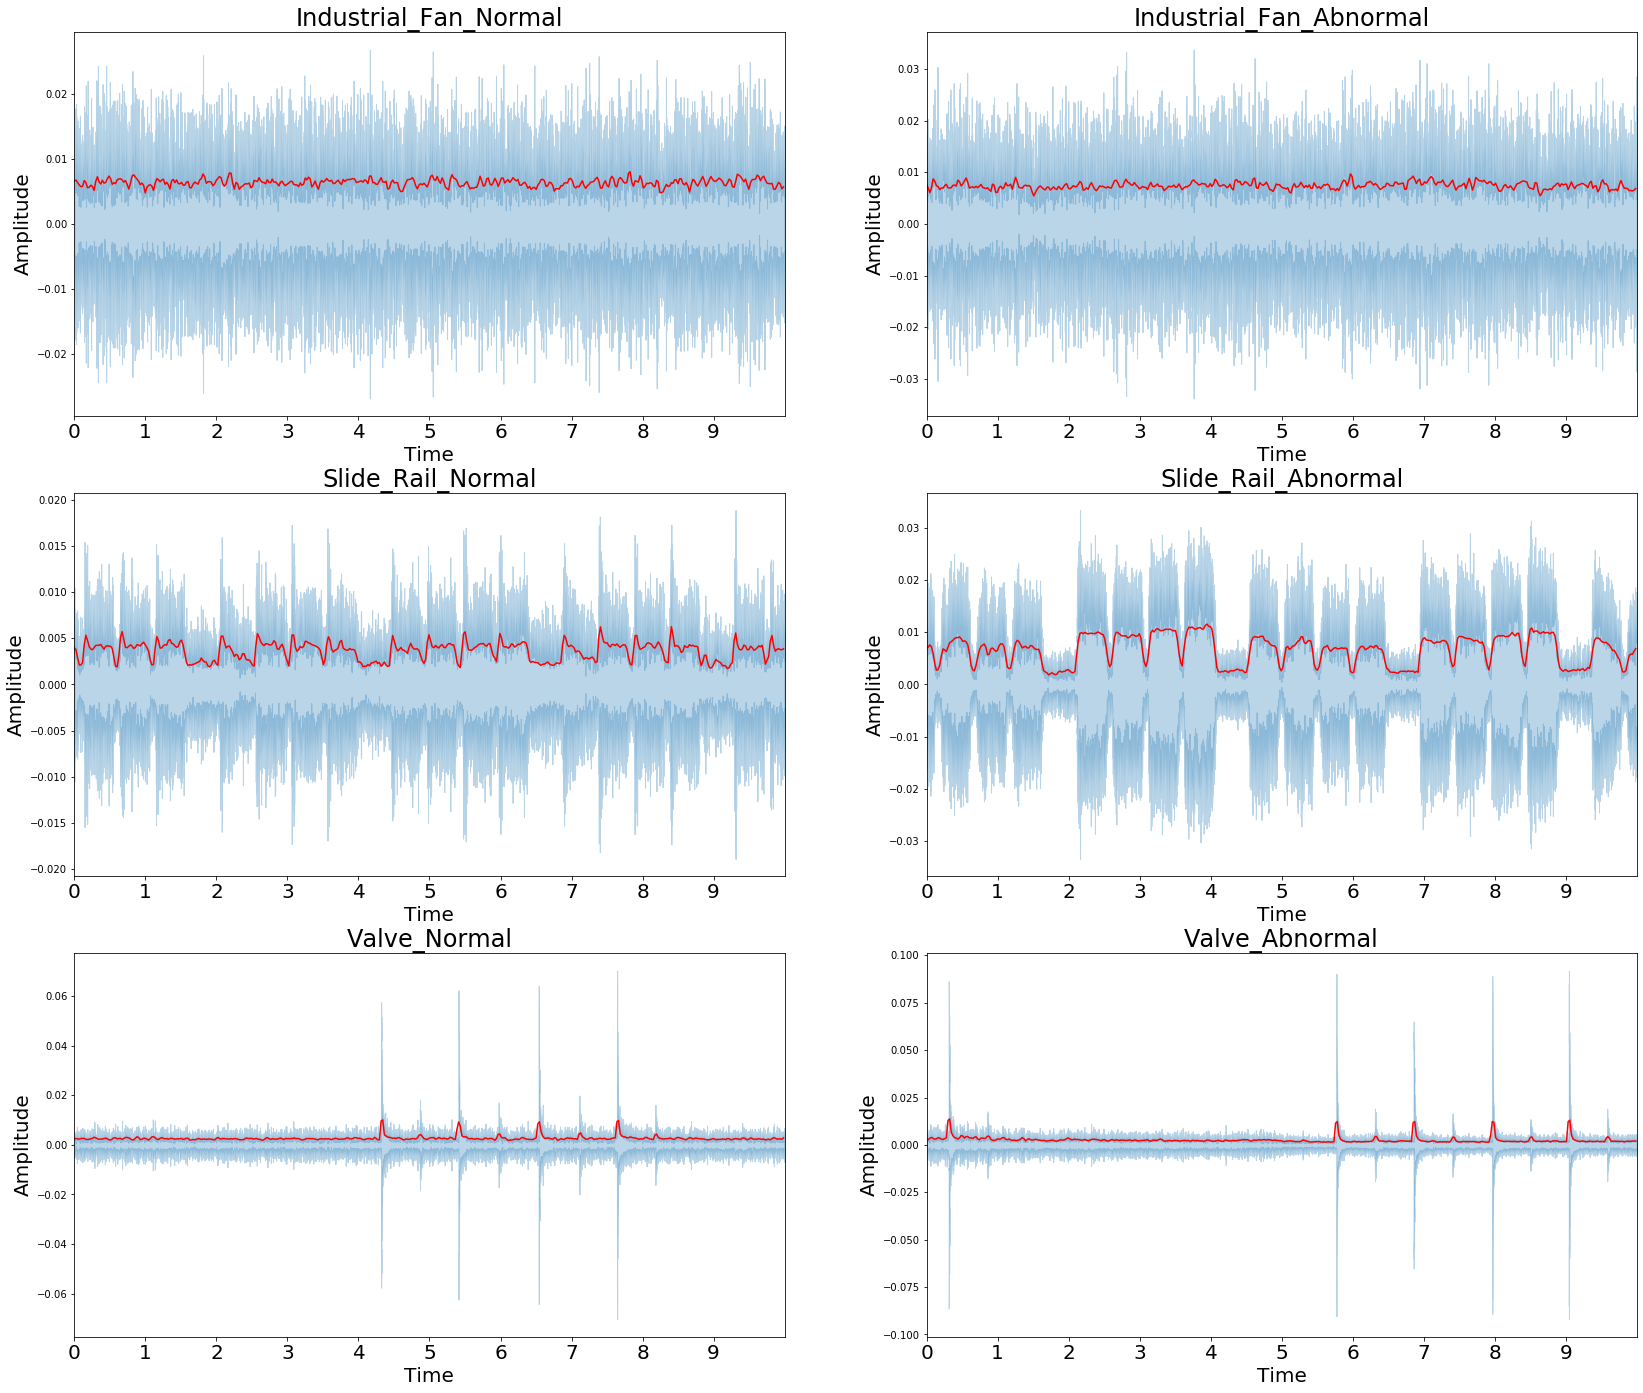

In [26]:
# RMS energy for Waveforms 
RMS_wfs = [librosa.feature.rms(wf, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0] for wf in wfs]

# Visualize the RMS waveforms
plt.figure(figsize=(FIG_W, FIG_H))
for n in range(len(wfs)):
    plot_superimposed_waveforms(waveform=wfs[n], superimposed_waveform=RMS_wfs[n], 
                                title=machine_sound_category[n], row=3, col=2, n_plot=n+1)

Zero Crossing Rate
================

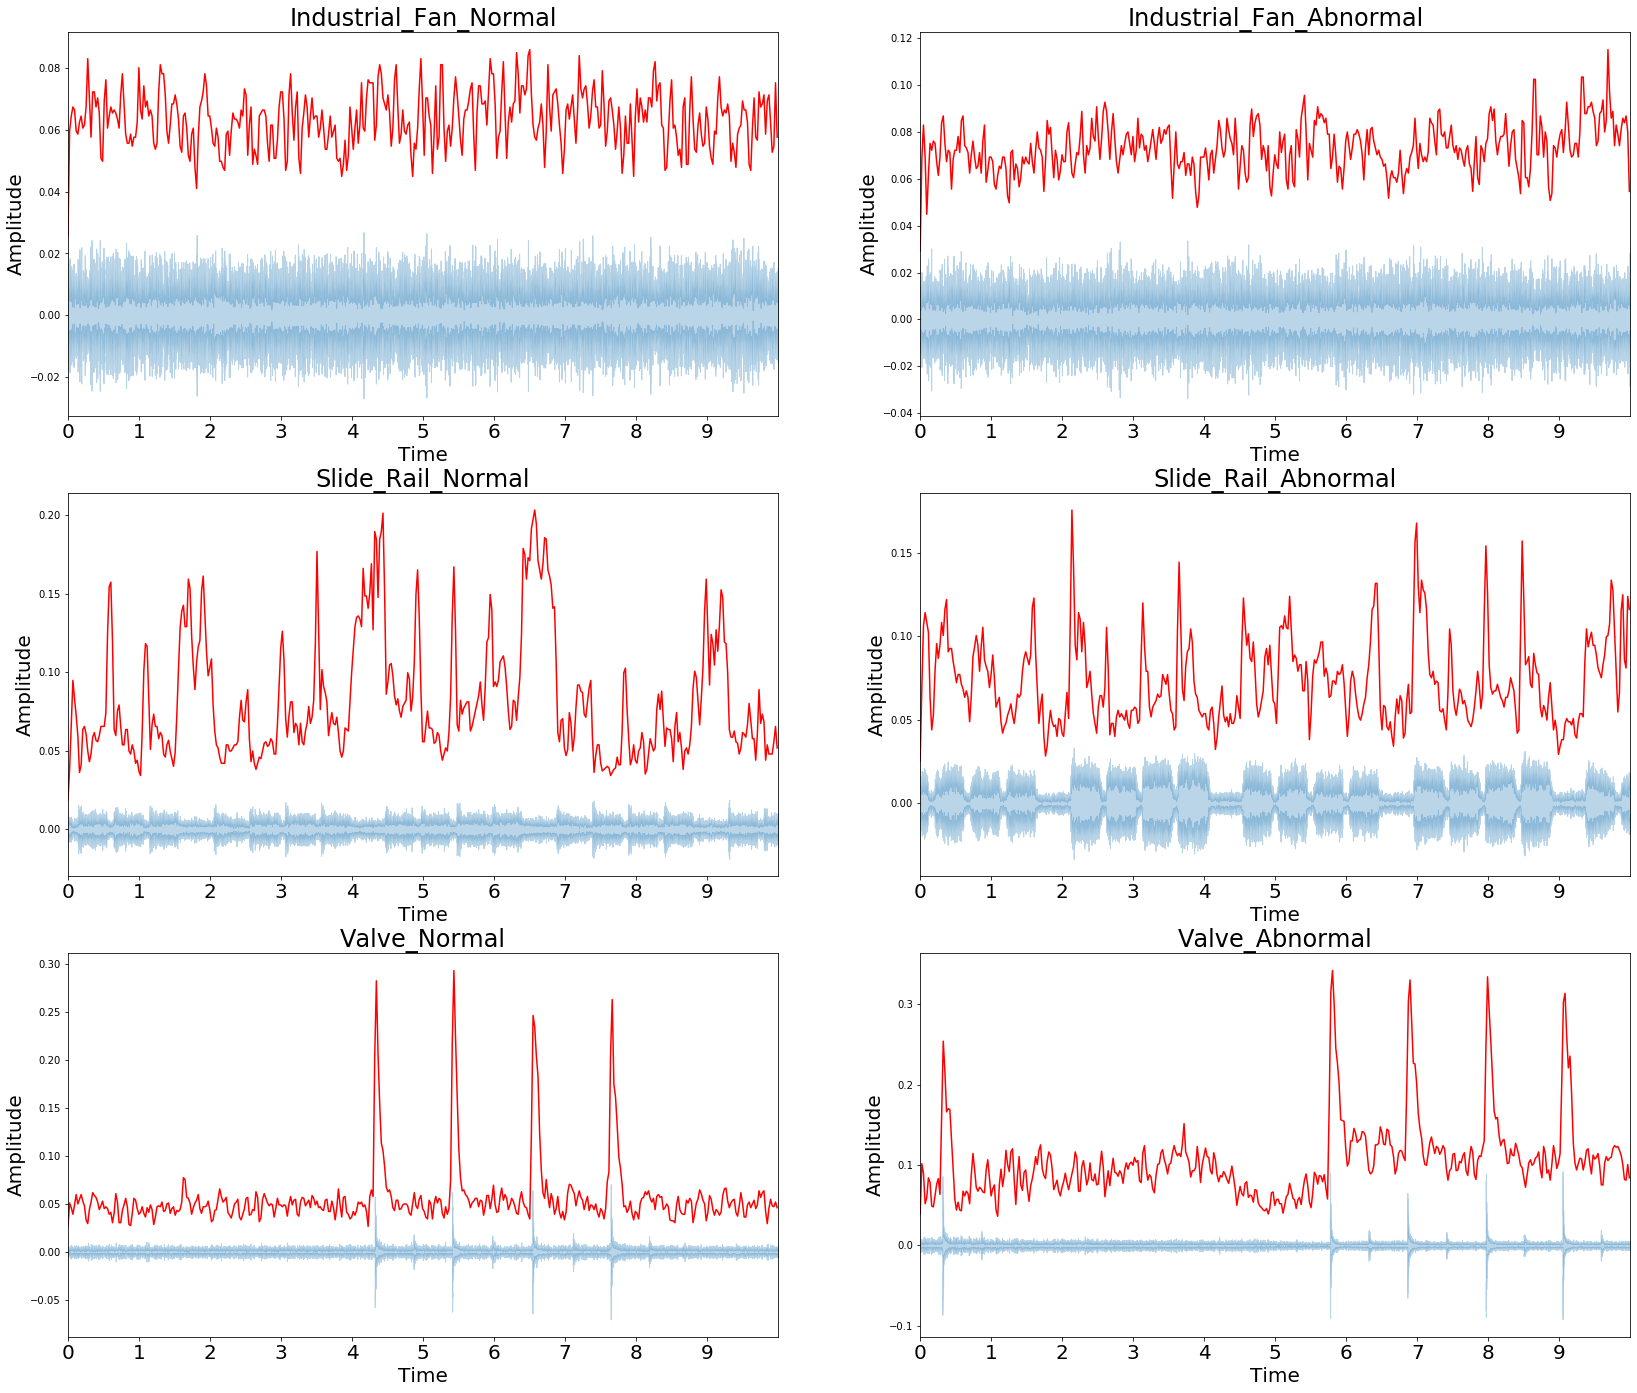

In [27]:
# Find ZCR for waveforms 
ZCR_wfs = [librosa.feature.zero_crossing_rate(wf, frame_length=FRAME_SIZE, hop_length=HOP_LENGHT)[0] for wf in wfs]

# Visualize the ZCR waveforms
plt.figure(figsize=(FIG_W, FIG_H))

for n in range(len(wfs)):
    plot_superimposed_waveforms(waveform=wfs[n], superimposed_waveform=ZCR_wfs[n], 
                                title=machine_sound_category[n], row=3, col=2, n_plot=n+1)

In [28]:
def plot_zcrplot(waveform=None, color='b'):
    frames = range(len(waveform))
    T = librosa.frames_to_time(frames, hop_length=HOP_LENGHT)
    plt.plot(T, waveform, color=color, alpha=0.4)

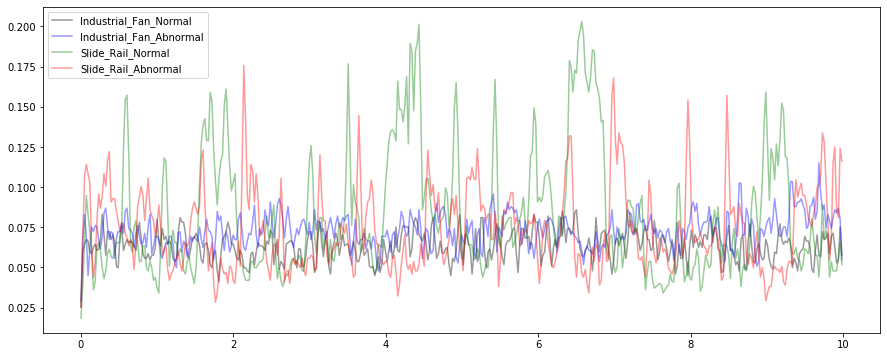

In [29]:
# Visualize the ZCR waveforms - superimosed all together
plt.figure(figsize=(15, 6))

colors = ['k', 'b', 'g', 'r']
for n in range(len(ZCR_wfs)-2):
    plot_zcrplot(ZCR_wfs[n], color=colors[n])

plt.legend(machine_sound_category, loc ="upper left")